# 사전 학습된 CNN

In [1]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline


#https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt   

Using TensorFlow backend.


In [2]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')


#Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')


#Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
#Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')  





553467904/553467096 [==============================] - 126s 0us/step




102858752/102853048 [==============================] - 30s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 5s 0us/step


In [3]:
vgg_model.summary()    # 138,357,544
#inception_model.summary() # 23,851,784
#resnet_model.summary()  # 25,636,712
#mobilenet_model.summary() # 4,253,864

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

cnn은 무조건 4차원으로 넣어야 한다.  
영상 크기는 224 * 244로 맞춰줘야 사용 가능 (input img를 이 크기로 맞춤)  

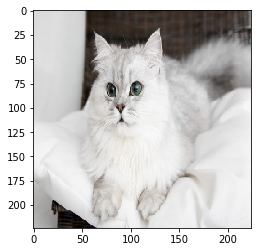

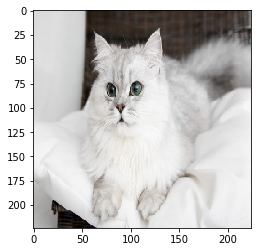

image batch size (1, 224, 224, 3)


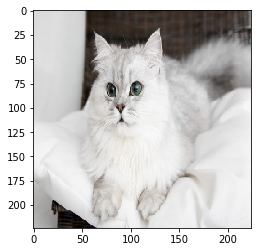

In [4]:
filename = 'img/cat.jpg'
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


======processed_image====== (1, 224, 224, 3)
float32


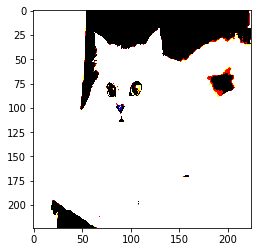

======predictions====== (1, 1000)
[[3.42162565e-08 1.22566041e-06 3.35593882e-06 2.69396878e-06
  2.49008144e-06 4.48005676e-06 2.89464197e-06 8.68035295e-06
  3.63426770e-05 6.75500416e-07 2.38927811e-07 2.16670614e-07
  2.14501074e-06 4.99262387e-06 4.98817201e-07 4.42731988e-07
  1.48355423e-06 4.20493525e-05 3.33630078e-06 6.39142672e-06
  1.49749451e-06 3.10122118e-06 2.27603186e-06 1.08877111e-06
  1.31695406e-05 5.65056339e-08 6.77885268e-08 5.02646515e-07
  1.48219300e-07 8.19998320e-07 1.00019030e-07 6.62811658e-07
  1.02685050e-07 7.74547360e-08 1.73452079e-07 5.62084708e-08
  2.45423053e-07 1.30062816e-07 4.26315239e-07 2.01752187e-06
  3.47519062e-06 3.31032624e-07 2.80823457e-07 3.94560772e-07
  4.38557618e-06 2.83090515e-07 1.32416271e-05 1.69562739e-07
  5.94967453e-08 1.62860175e-07 9.29038094e-07 5.86607371e-07
  9.31738157e-07 6.76395757e-07 4.51032861e-07 9.49381331e-07
  4.20270965e-07 1.30728125e-07 3.80710759e-07 2.69915563e-06
  1.93015694e-06 1.22955839e-07 5.38

In [14]:
processed_image = vgg16.preprocess_input(image_batch.copy())
#input:각 모델마다 있음 #변경될 수도 있으니 안전하게 copy함
print('======processed_image======',processed_image.shape)
print(processed_image.dtype)
plt.imshow(processed_image[0], cmap="gray")
plt.show()
predictions = vgg_model.predict(processed_image)
#predict는 그냥 마지막까지 계산하라는 의미. processed image 아닌 것 넣어도 큰 차이 없어.
print('======predictions======',predictions.shape)
print(predictions)
label_vgg = decode_predictions(predictions, top=10) #확률값 상위 10개의 label 가져와
#확률값에서 맥시멈아이디 찾은 다음에 그것의 label을 가져오는 함수. (계산하는 건 아님)
print('======label_vgg======',label_vgg)

In [15]:
processed_image = resnet50.preprocess_input(image_batch.copy())
predictions = resnet_model.predict(processed_image)
label_resnet = decode_predictions(predictions, top=3)
label_resnet

[[('n02123394', 'Persian_cat', 0.27803516),
  ('n02127052', 'lynx', 0.27067396),
  ('n04493381', 'tub', 0.08564318)]]

In [16]:
processed_image = mobilenet.preprocess_input(image_batch.copy())
predictions = mobilenet_model.predict(processed_image)
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[('n02123394', 'Persian_cat', 0.88969684),
  ('n02127052', 'lynx', 0.078016385),
  ('n15075141', 'toilet_tissue', 0.0039789206),
  ('n02328150', 'Angora', 0.003258054),
  ('n03958227', 'plastic_bag', 0.001995892)]]

In [23]:
filename = 'img/cat.jpg'
original = load_img(filename, target_size=(299, 299))
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

processed_image = inception_v3.preprocess_input(image_batch.copy())
predictions = inception_model.predict(processed_image)
label_inception = decode_predictions(predictions)
label_inception

[[('n02123394', 'Persian_cat', 0.6742712),
  ('n02127052', 'lynx', 0.07873011),
  ('n04447861', 'toilet_seat', 0.012816058),
  ('n02328150', 'Angora', 0.012419724),
  ('n04553703', 'washbasin', 0.009446613)]]

In [24]:
import cv2
img = cv2.imread("img/cat.jpg")
img = cv2.resize(img, (1000,1000))
cv2.putText(img, "VGG16: {}, {:.2f}".format(label_vgg[0][0][1], label_vgg[0][0][2]) , (350, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "MobileNet: {}, {:.2f}".format(label_mobilenet[0][0][1], label_mobilenet[0][0][2]) , (350, 75), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "Inception: {}, {:.2f}".format(label_inception[0][0][1], label_inception[0][0][2]) , (350, 110), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.putText(img, "ResNet50: {}, {:.2f}".format(label_resnet[0][0][1], label_resnet[0][0][2]) , (350, 145), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 3)
cv2.imwrite("img/pretrainedcnn_out.jpg", img)

True